In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from anndata import AnnData

%matplotlib inline
from matplotlib.image import imread

sns.set_style("darkgrid")
sns.set_palette("muted")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
adata=sc.read("../data/spf_mouse_brain_bin100_raw.h5ad")
adata

AnnData object with n_obs × n_vars = 20347 × 26966
    obs: 'orig.ident', 'x', 'y'
    uns: 'sn'
    obsm: 'spatial'

In [3]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata, key_added="leiden_pca")
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


2023-04-11 03:30:19.610734: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 03:30:19.740619: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-11 03:30:19.744535: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-11 03:30:19.744552: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [4]:
adata.obs.head()

,orig.ident,x,y,leiden_pca
132_43,sample,19775,7275,2
91_6,sample,15675,3575,23
96_109,sample,16175,13875,15
69_21,sample,13475,5075,10
109_22,sample,17475,5175,2


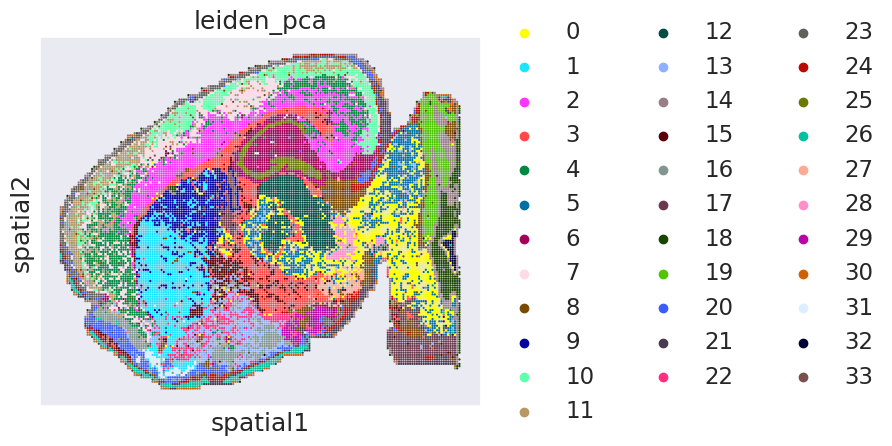

In [5]:
sc.pl.spatial(adata, color=["leiden_pca"], img_key = None, spot_size = 100)

In [6]:
import squidpy as sq

In [7]:
sq.gr.spatial_neighbors(adata, coord_type="grid", n_neighs=4)

In [8]:
## extract graph
sc_dist = adata.obsp["distances"]
sc_dist

<20347x20347 sparse matrix of type '<class 'numpy.float64'>'
	with 183123 stored elements in Compressed Sparse Row format>

In [9]:
sc_connect = adata.obsp["connectivities"]
sc_connect

<20347x20347 sparse matrix of type '<class 'numpy.float32'>'
	with 270576 stored elements in Compressed Sparse Row format>

In [10]:
k_nearest_pca = pd.DataFrame(adata.obsm["X_pca"])
k_nearest_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-27.489183,-96.737686,-0.839064,19.456404,24.564425,16.043390,13.749486,-28.058865,-28.569538,2.622848,...,-19.168335,6.099141,-0.990820,-11.096417,1.535104,3.125949,1.922822,-6.199202,-6.192393,-4.343349
1,-73.520531,64.858688,-4.891375,-30.821842,-35.233086,-3.369322,12.438157,-20.091080,-13.769279,-5.220274,...,0.114248,-2.056430,-4.241330,-2.235033,-4.135140,-4.300495,-0.796744,-0.467331,-8.741307,5.882603
2,-89.687202,24.821653,11.803741,-11.658211,99.067406,-22.340876,-133.918488,46.883053,3.959560,-20.605364,...,-4.896831,-11.840623,-5.110133,4.479335,4.981234,2.362186,-0.414557,-2.360894,-0.025688,-0.165497
3,65.626106,-56.359749,-4.833405,-9.839166,-27.885769,-3.662290,-13.399894,-29.237005,-12.306395,6.291691,...,7.456558,-3.793346,-4.134475,4.645646,10.249460,-1.579854,18.287697,5.312356,1.014595,12.667249
4,14.479812,-101.872643,-2.444713,2.026265,-6.763916,-3.978602,-43.542328,-3.640854,34.115047,12.067738,...,14.344048,-0.458151,1.225845,-1.317019,-0.333479,2.348249,14.593504,-6.648700,-8.874554,-4.238015


In [11]:
k_nearest_pca.to_csv("../mouse_brain_bin100_sc_pp.csv")

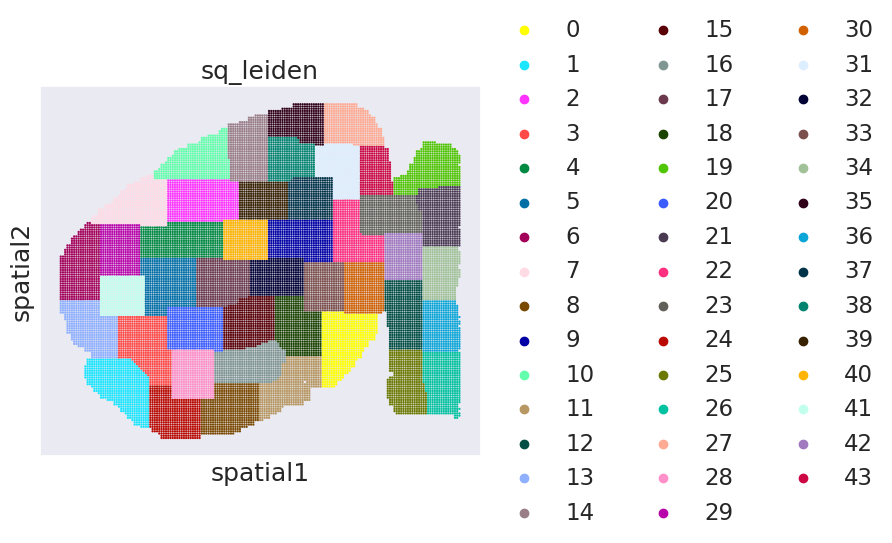

In [12]:
sc.tl.leiden(adata, resolution=1, key_added="sq_leiden", neighbors_key="spatial_neighbors", use_weights = True)

sc.pl.spatial(adata, color=["sq_leiden"], img_key = None, spot_size = 100)